### Analysis on the Popularity of Different Programming Languages over Time using Pandas and Matplotlib

<img src="image.jpg" style ="width:500px;height:300px"/>

-  The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular? Which programming language is the Kim Kardashian of programming languages; the one people just can't stop talking about? 

- StackOverflow will help us answer this burning question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

- To figure out which language is the most popular, all we need to do is count the number of posts on Stack Overflow that are tagged with each language. The language with the most posts wins!

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

- The data contains number of times a programming language is mentioned in posts over time on stack overflow, from 1st of July 2008  to 1st of September 2021.
- We'll be using the data to find out the trend on the popularity of each programming language.

## Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [2]:
#read the data
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,84
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
2169,2021-08-01 00:00:00,perl,135
2170,2021-08-01 00:00:00,r,4791
2171,2021-08-01 00:00:00,php,5479
2172,2021-08-01 00:00:00,swift,2362
2173,2021-08-01 00:00:00,ruby,532


In [5]:
df.shape

(2174, 3)

In [6]:
df.count()

DATE     2174
TAG      2174
POSTS    2174
dtype: int64

#### Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum().sort_values('POSTS', ascending = False).T

TAG,javascript,java,python,c#,php,c++,r,c,swift,ruby,perl,go,delphi,assembly
POSTS,2262504,1795094,1784896,1494768,1412469,735424,416703,363727,301279,220715,65853,55807,48457,38432


#### Javascript had the highest total number of posts, followed by java then python. People don't seem to talk post about assembly language so much.

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.
How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,157,157
c,157,157
c#,158,158
c++,157,157
delphi,157,157
go,142,142
java,157,157
javascript,157,157
perl,157,157


#### go language had the fewest months. The highest number of months was 158 which is c# programming language

## Data Cleaning

Let's fix the date format to make it more readable. 
We use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [10]:
type(df['DATE'][1])

str

In [11]:
#convert a single date value
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


## Data Manipulation



In [13]:
#create a pivot table
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [14]:
#check the shape
reshaped_df.shape

(158, 14)

In [15]:
#check the columns
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [16]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,507.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


#### Number of entries per programming language

In [17]:
reshaped_df.count() 

TAG
assembly      157
c             157
c#            158
c++           157
delphi        157
go            142
java          157
javascript    157
perl          157
php           157
python        157
r             155
ruby          157
swift         149
dtype: int64

In [18]:
#check for any missing value
reshaped_df.isna().values.any()

True

In [19]:
#fill any missing value with 0
reshaped_df.fillna(0, inplace=True) 

In [20]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,84.0,507.0,164.0,14.0,0.0,222.0,163.0,28.0,160.0,124.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0


In [21]:
#check for any missing value
reshaped_df.isna().values.any()

False

## Data Visualisaton with Matplotlib


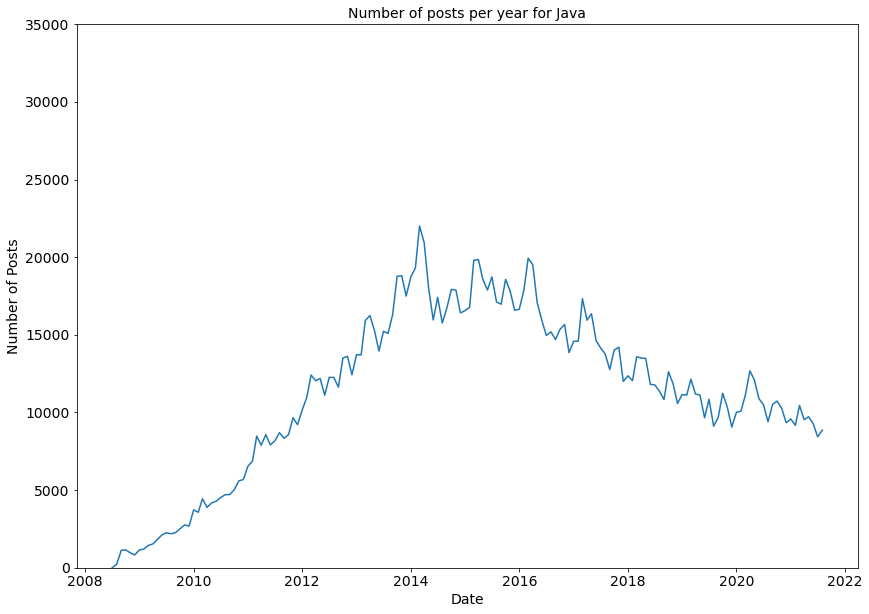

In [22]:
plt.figure(figsize=(14,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Number of posts per year for Java', fontsize = 14)
plt.plot(reshaped_df.index, reshaped_df.java)

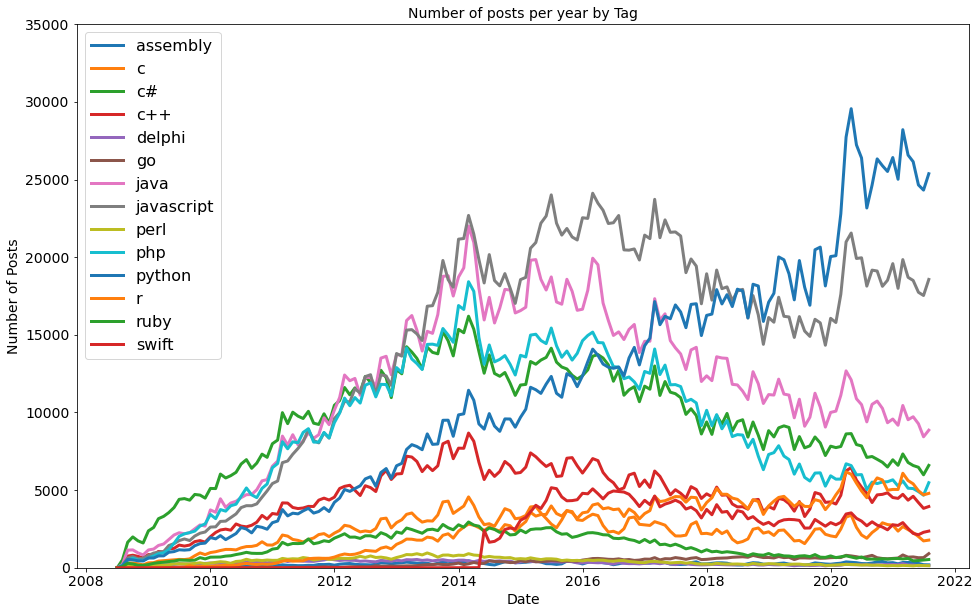

In [23]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Number of posts per year by Tag', fontsize = 14)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one observation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [24]:
reshaped_df.index.year.unique()

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='DATE')

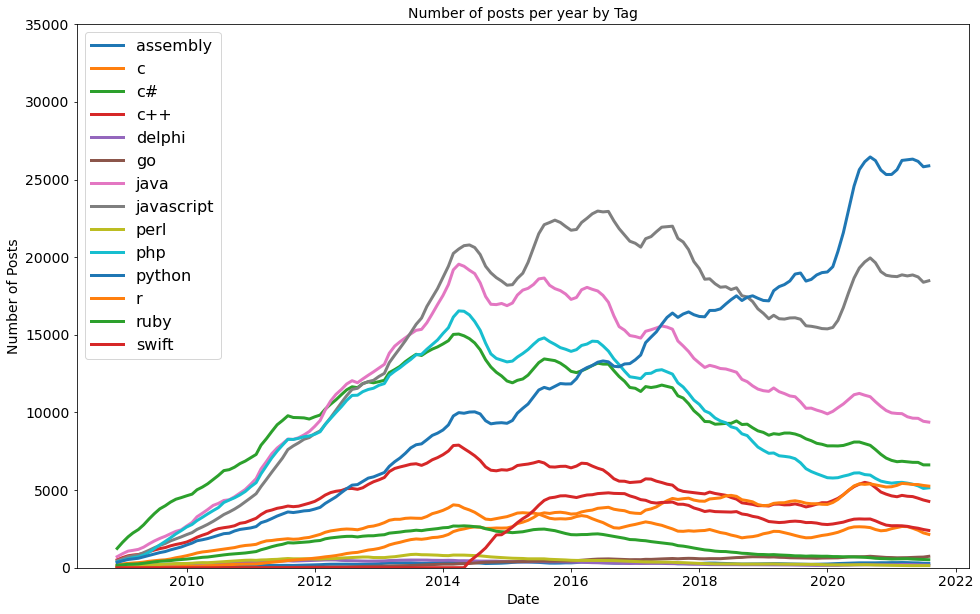

In [25]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
x = [reshaped_df.index.year.unique()]
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Number of posts per year by Tag', fontsize = 14)

# plot the roll_df instead
for column in roll_df.columns:
     plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
    

plt.legend(fontsize=16)

### The most popular language from 2020 to 2021 by the number of posts is python, followed by javascript.
### The most popular programming language from 2008 to 2012 by the number of posts is c# followed by Java.
### The most popular programming language from 2015 to 2018 by the number of posts is javascript.